# Example of a TOOCAN data handling

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import colorsys
import datetime
import glob
import math
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
from matplotlib.lines import Line2D
from matplotlib.dates import DateFormatter, DayLocator, HourLocator
import numpy as np
import re
import scipy
import sys
import warnings
import xarray as xr 

## Inputs

In [37]:
path    = '/bdd/MT_WORKSPACE/lgouttes/MODELS/DYAMOND/Summer/SAM/235K/TOOCAN/' #'/bdd/MEGHA_TROPIQUES/MCS/EXPORT/TOOCAN/'
version = 'TOOCAN_v2.08'
region  = 'GLOBAL' #'AFRICA'
year    = 2016
month   = 8
day     = 30
hour    = 3
minute  = 30
lonmin, lonmax, latmin, latmax = 0, 360, -30, 30

date_image = datetime.datetime(year, month, day, hour, minute)
filetrack  = glob.glob(f'{path}/{version}/{region}/{year}/FileTracking_NETCDF/TOOCAN-{region}-{year}{month:02d}*')
print("date_image :", date_image)
print("filetrack  :", filetrack)

date_image : 2016-08-30 03:30:00
filetrack  : ['/bdd/MT_WORKSPACE/lgouttes/MODELS/DYAMOND/Summer/SAM/235K/TOOCAN//TOOCAN_v2.08/GLOBAL/2016/FileTracking_NETCDF/TOOCAN-GLOBAL-20160801-20160831.nc']


## Loading filetracking

In [38]:
ds_filetracking = xr.open_dataset(filetrack[0])
ds_filetracking

<xarray.Dataset>
Dimensions:                 (time: 1556, DCS: 223648)
Coordinates:
  * time                    (time) datetime64[ns] 2016-08-01 ... 2016-09-02T0...
  * DCS                     (DCS) int32 1 2 3 4 ... 238201 238212 238219 238223
Data variables: (12/54)
    INT_DCSnumber           (DCS) float64 ...
    INT_DCS_qualitycontrol  (DCS) float64 ...
    INT_classif             (DCS) float64 ...
    INT_duration            (DCS) float32 ...
    INT_UTC_timeInit        (DCS) datetime64[ns] ...
    INT_localtime_Init      (DCS) datetime64[ns] ...
    ...                      ...
    LC_surfPix_235K         (DCS, time) float64 ...
    LC_surfPix_210K         (DCS, time) float64 ...
    LC_surfkm2_235K         (DCS, time) float32 ...
    LC_surfkm2_220K         (DCS, time) float32 ...
    LC_surfkm2_210K         (DCS, time) float32 ...
    LC_surfkm2_200K         (DCS, time) float32 ...
Attributes: (12/16)
    title:                TOOCAN - Morphological characteristics of the Deep ...
    creator_name:         Thomas Fiolleau
    contributor_name:     Remy Roca
    contact:              thomas.fiolleau@cnrs.fr
    institution:          CNRS/IPSL/LEGOS
    conventions:          CF-1.6, ACDD-1.3
    ...                   ...
    temporal_resolution:  30 min
    Spatial_resolution:   0.04 degree
    time_coverage_start:  08/01/2016 00:00 UTC
    time_coverage_End:    09/02/2016 09:30 UTC
    DCS_occurence:        223646
    Creation_date:        2024-03-29T16:37:08 UTC

#### Only keep few variables for this example

In [39]:
ds_filetracking_extract = ds_filetracking[['INT_duration','INT_localtime_Init', 'INT_surfmaxkm2_235K','INT_surfcumkm2_235K','LC_tbmin', 'LC_lon', 'LC_lat', 'LC_surfkm2_235K', 'LC_surfkm2_220K', 'LC_surfkm2_210K', 'LC_surfkm2_200K']]
ds_filetracking_extract

<xarray.Dataset>
Dimensions:              (DCS: 223648, time: 1556)
Coordinates:
  * time                 (time) datetime64[ns] 2016-08-01 ... 2016-09-02T09:3...
  * DCS                  (DCS) int32 1 2 3 4 5 ... 238201 238212 238219 238223
Data variables:
    INT_duration         (DCS) float32 ...
    INT_localtime_Init   (DCS) datetime64[ns] ...
    INT_surfmaxkm2_235K  (DCS) float32 ...
    INT_surfcumkm2_235K  (DCS) float32 ...
    LC_tbmin             (DCS, time) float32 ...
    LC_lon               (DCS, time) float32 ...
    LC_lat               (DCS, time) float32 ...
    LC_surfkm2_235K      (DCS, time) float32 ...
    LC_surfkm2_220K      (DCS, time) float32 ...
    LC_surfkm2_210K      (DCS, time) float32 ...
    LC_surfkm2_200K      (DCS, time) float32 ...
Attributes: (12/16)
    title:                TOOCAN - Morphological characteristics of the Deep ...
    creator_name:         Thomas Fiolleau
    contributor_name:     Remy Roca
    contact:              thomas.fiolleau@cnrs.fr
    institution:          CNRS/IPSL/LEGOS
    conventions:          CF-1.6, ACDD-1.3
    ...                   ...
    temporal_resolution:  30 min
    Spatial_resolution:   0.04 degree
    time_coverage_start:  08/01/2016 00:00 UTC
    time_coverage_End:    09/02/2016 09:30 UTC
    DCS_occurence:        223646
    Creation_date:        2024-03-29T16:37:08 UTC

## MCS Lifetime duration distribution for the given month 

In [40]:
durations = ds_filetracking_extract.INT_duration.values
durations

array([34.5, 40. , 53.5, ...,  8.5,  5.5,  6.5], dtype=float32)

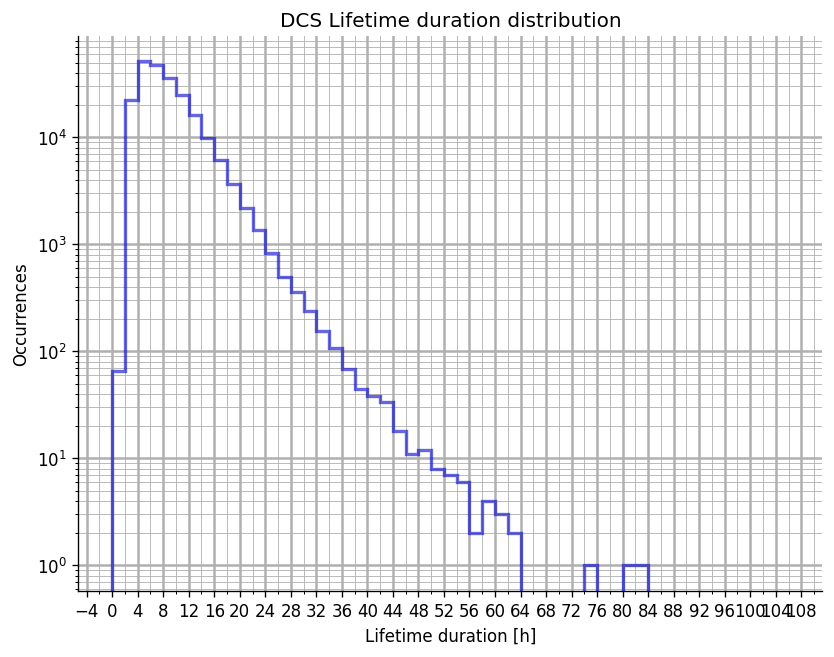

In [41]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

ax.hist(durations, histtype='step', bins=range(0,math.ceil(np.max(durations))+1,2), label='lifetime duration [h]', lw=2, alpha=0.6, log=1, color='mediumblue')

ax.set_xlabel('Lifetime duration [h]' ,fontsize=10)
ax.set_ylabel('Occurrences',fontsize=10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(4))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(2))
ax.grid(True, linewidth=0.5, which='minor', axis='x')
ax.grid(True, linewidth=1.5, which='major', axis='x')
ax.grid(True, linewidth=0.5, which='minor', axis='y')
ax.grid(True, linewidth=1.5, which='major', axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(f'DCS Lifetime duration distribution', fontsize=12);


## CDF of the maximum surface reached by the MCS at 235K

In [42]:
Smax = ds_filetracking_extract.INT_surfmaxkm2_235K.values
Smax

array([377157.25, 797401.7 , 733833.5 , ...,   2164.16,   2706.43,
         2929.73], dtype=float32)

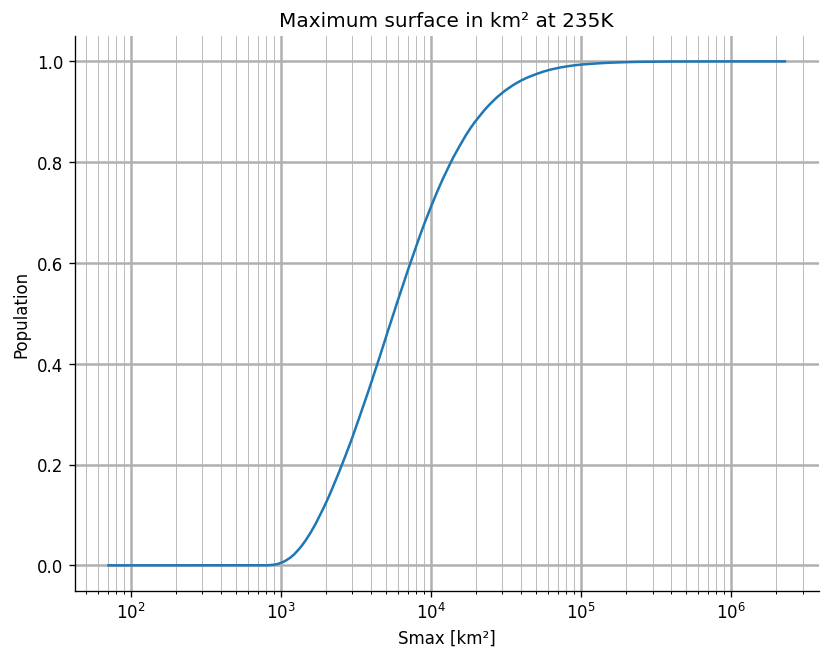

In [43]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

ax.plot(np.sort(Smax),np.arange(Smax.size)/Smax.size)

ax.set_xscale('log')
ax.grid(True, linewidth=0.5, which='minor', axis='x')
ax.grid(True, linewidth=1.5, which='major', axis='x')
ax.grid(True, linewidth=0.5, which='minor', axis='y')
ax.grid(True, linewidth=1.5, which='major', axis='y')
ax.set_title(f'Maximum surface in km² at 235K', fontsize=12)
ax.set_xlabel(f'Smax [km²]', fontsize=10)
ax.set_ylabel('Population', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



## TOOCAN Figure of the cloudy stage according to the given region and date

#### Create a list of 256 colors values 

In [44]:
nlabels=256

randHSVcolors = [(np.random.uniform(low=0.0, high=1), np.random.uniform(low=0.2, high=1), np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

randHexColors = []
for HSVcolor in randHSVcolors:
	rgb_color = colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2])
	hex_color = rgb2hex(rgb_color)
	randHexColors.append(hex_color)
# randHexColors

# randRGBcolors = []
# for HSVcolor in randHSVcolors:
#     randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))
# random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)
# random_colormap

#### Calculation of the slot depending on hour and minute input variables 

In [45]:
reso_tempo=int(ds_filetracking_extract.attrs['temporal_resolution'].split(' ')[0])
slot = 1 + date_image.hour*int(60/reso_tempo) + int(date_image.minute/reso_tempo)

#### Open netcdf file corresponding to TOOCAN segmented image at given time 

In [46]:
warnings.filterwarnings('ignore', category=xr.SerializationWarning)
path_file = f'{path}/{version}/{region}/{year}/{year}_{month:02d}_{day:02d}/ToocanCloudMask_SAM_{year}{month:02d}{day:02d}-{slot:03d}.nc'
ds = xr.open_dataset(path_file)

#### List the DCS in the corresponding segmented image

In [60]:
iDCS_number = np.sort(np.unique(ds.DCS_number.sel(longitude=slice(lonmin, lonmax), latitude=slice(latmin, latmax)).values))[:-1]    # last value is nan (where there is no values (i.e. -999, -998), xr.open_dataset decodes to NaN)
levels      = list(iDCS_number-.5) + [(iDCS_number[-1]+.5)]    # list of levels that include first and last DCS_number
colors      = [randHexColors[int(k%256)] for k in iDCS_number] # Each DCS_number has a random color

#### Create cartopy figure 

In [61]:
%%time
fig, ax = plt.subplots(figsize=(8, 8), dpi=120, subplot_kw={'projection':ccrs.PlateCarree()})

ax.set_extent((lonmin, lonmax, latmin, latmax))
ax.add_feature(cfeat.LAND, zorder=0)
ax.add_feature(cfeat.OCEAN, zorder=0)
ax.gridlines(draw_labels=True, xlocs=range(-180, 181, 10), ylocs=range(-90, 91, 5), alpha=0.75, linestyle='--')
ax.coastlines(resolution='50m', color='black', lw=0.2)

# DCS and contours
ds.DCS_number.squeeze().plot.imshow(ax=ax, colors=colors, levels=levels, zorder=1, transform=ccrs.PlateCarree(), add_colorbar=False )
ds.DCS_number.fillna(0).squeeze().plot.contour(ax=ax, colors='.2', levels=levels, zorder=1, transform=ccrs.PlateCarree(), add_colorbar=False, linewidths=.3)

# DCS Center of mass 
ds_filetracking_extract.sel(time=ds.time).plot.scatter(x='LC_lon',y='LC_lat', color='black', s=8, transform=ccrs.PlateCarree(), zorder=102, ax=ax)

# DCS trajectories
ds_filetracking_extract = ds_filetracking_extract.sel(time=slice(None,ds.time[0]))
for iDCS in iDCS_number:
    lons = ds_filetracking_extract.sel(DCS=iDCS).LC_lon
    lats = ds_filetracking_extract.sel(DCS=iDCS).LC_lat
    ax.plot(lons.values, lats.values, color='black', lw=1,transform=ccrs.PlateCarree(), zorder=102)

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:873: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.set_xlim([x1, x2])


### Statistics of DCS included in the cloudy stage

In [14]:
ds_filetracking_extract = ds_filetracking_extract.sel(DCS=iDCS_number)
ds_filetracking_extract

<xarray.Dataset>
Dimensions:              (DCS: 54, time: 440)
Coordinates:
  * time                 (time) datetime64[ns] 2017-01-01 ... 2017-01-10T03:3...
  * DCS                  (DCS) int32 2189873 2189879 2189882 ... 2207866 2207873
Data variables:
    INT_duration         (DCS) float32 9.5 10.5 15.5 19.0 ... 3.0 3.0 2.5 6.5
    INT_localtime_Init   (DCS) datetime64[ns] ...
    INT_surfmaxkm2_235K  (DCS) float32 4.245e+04 5.382e+04 ... 1.576e+03
    INT_surfcumkm2_235K  (DCS) float32 ...
    LC_tbmin             (DCS, time) float32 ...
    LC_lon               (DCS, time) float32 ...
    LC_lat               (DCS, time) float32 ...
    LC_surfkm2_235K      (DCS, time) float32 ...
    LC_surfkm2_220K      (DCS, time) float32 ...
    LC_surfkm2_210K      (DCS, time) float32 ...
    LC_surfkm2_200K      (DCS, time) float32 ...
Attributes: (12/17)
    title:                   TOOCAN - Morphological characteristics of the De...
    creator_name:            Thomas Fiolleau
    contributor_name:        Remy Roca
    contact:                 thomas.fiolleau@cnrs.fr
    institution:             CNRS/LEGOS/IPSL
    conventions:             CF-1.6, ACDD-1.3
    ...                      ...
    region_latitude:         -40 -     40
    temporal_resolution:     30 min
    Spatial_resolution:      0.04 degree
    time_coverage_start:     01/01/2017 00:00 UTC
    time_coverage_End:       02/01/2017 18:30 UTC
    DCS_occurence:           45886

#### Surface evolution for each DCS of this cloudy stage 

CPU times: user 45.6 s, sys: 178 ms, total: 45.8 s
Wall time: 45.8 s


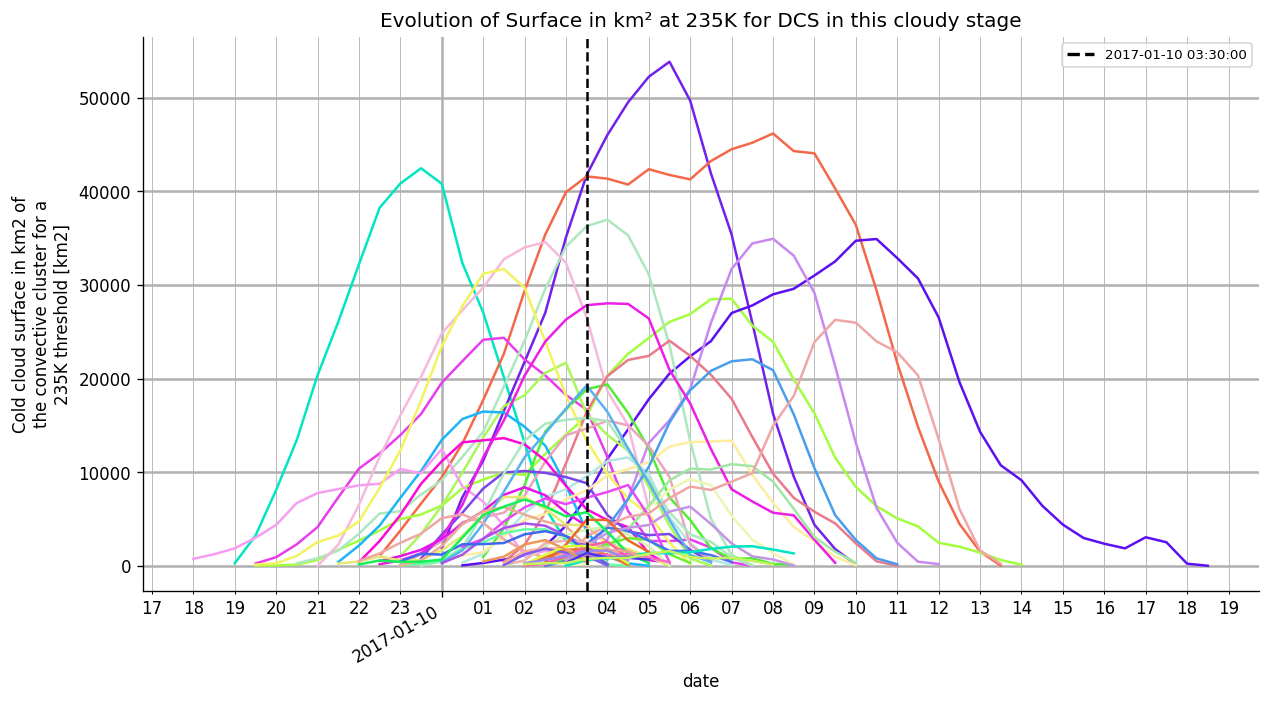

In [15]:
%%time
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

# ax.set_yscale('log')
ax.grid(True, linewidth=0.5, which='minor', axis='x')
ax.grid(True, linewidth=1.5, which='major', axis='x')
ax.grid(True, linewidth=0.5, which='minor', axis='y')
ax.grid(True, linewidth=1.5, which='major', axis='y')


ds_LC_surfkm2_235K = ds_filetracking[['LC_surfkm2_235K']].sel(DCS=iDCS_number)
for iDCS in iDCS_number:
    DCS_extract = ds_LC_surfkm2_235K.sel(DCS=iDCS).dropna('time')
    surf = DCS_extract.LC_surfkm2_235K
    surf.plot(ax=ax, color=randHexColors[int(iDCS%256)])
    # ax.plot(np.arange(0,surf.size)/int(60/reso_tempo)/DCS_extract.INT_duration.values*100, surf, color=randHexColors[int(iDCS%256)])
    # ax.plot(np.arange(0,surf.size)/int(60/reso_tempo)/DCS_extract.INT_duration.values*100, surf/DCS_extract.INT_surfmaxkm2_235K, color=randHexColors[int(iDCS%256)])
    # ax.scatter( (np.arange(0,surf.size)/int(60/reso_tempo)/DCS_extract.INT_duration.values*100)[-1], surf[-1], color='black', s=14, zorder=1e6)
    # break
    
ax.axvline(x=ds.time.values[0], color='k', linestyle='--')

legend_elements = [Line2D([0], [0], lw=2, color='k', label=f'{date_image}', linestyle='--')]
# legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'{date_image}', markerfacecolor='k', markersize=6)]
ax.set_title(f'Evolution of Surface in km² at 235K for DCS in this cloudy stage', fontsize=12)
ax.set_xlabel(f'date', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(handles=legend_elements, fontsize=8);
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator())
ax.xaxis.set_minor_formatter(DateFormatter("%H"))
ax.tick_params(axis='x',)


#### Tb evolution for a specific DCS of this cloudy stage


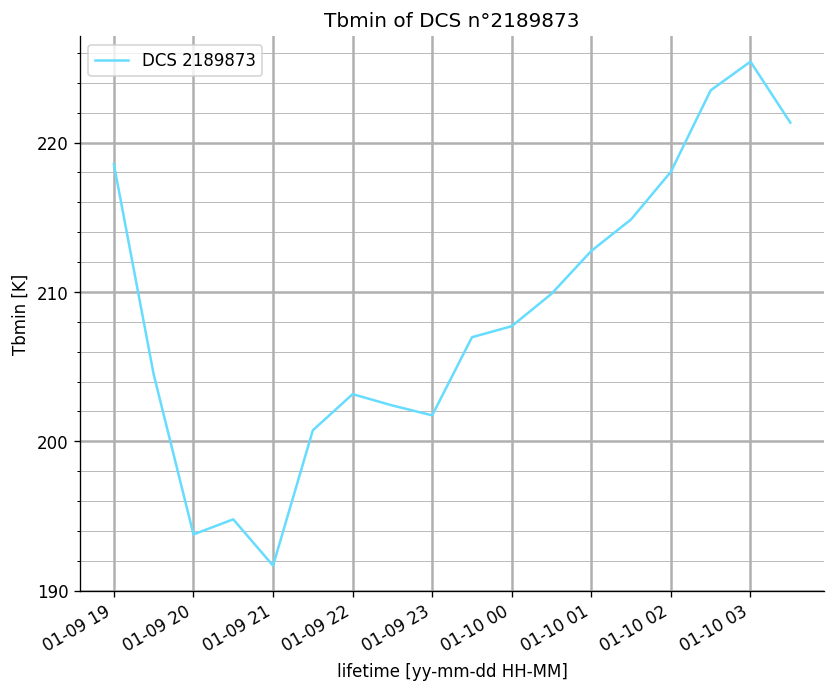

In [17]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

ds_filetracking_extract.sel(DCS=iDCS_number[0]).LC_tbmin.plot(ax=ax, label=f'DCS {int(iDCS_number[0])}', color=randHexColors[int(iDCS_number[0]%256)])

ax.yaxis.set_major_locator(mticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mticker.MultipleLocator(2))

ax.grid(True, linewidth=0.5, which='minor', axis='x', alpha=0.2)
ax.grid(True, linewidth=1.5, which='major', axis='x')
ax.grid(True, linewidth=0.5, which='minor', axis='y')
ax.grid(True, linewidth=1.5, which='major', axis='y')
ax.set_title(f'Tbmin of DCS n°{int(iDCS_number[0])}', fontsize=12)
ax.set_xlabel(f'lifetime [yy-mm-dd HH-MM]', fontsize=10)
ax.set_ylabel('Tbmin [K]', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend();

---
---
## Dependencies

Dependencies are fundamental to record the computational environment
 - Using of watermark to print version of python, ipython, packages, and characteristics of the computer

In [15]:
%load_ext watermark
%watermark -u -n -t -z

ModuleNotFoundError: No module named 'watermark'

In [16]:
%watermark -v -m -p cartopy,colorsys,datetime,glob,math,matplotlib,numpy,re,scipy,sys,warnings,xarray


UsageError: Line magic function `%watermark` not found.
